In [1]:
import csv
import pandas as pd
import numpy as np
import random

pd.set_option('mode.chained_assignment', None)

In [3]:
import glob
import os

finalDf = pd.DataFrame()
path = "*.csv"
for fname in glob.glob(path):
    df=pd.read_csv(fname)
    df.insert(3,"Food Group",os.path.basename(fname).split('.')[0],True)
    df.insert(4,"Type","single",True)
    single = True
    for i in df.index:
        if(df['KODE'][i]=="OLAHAN/PRODUK/KOMPOSIT") :
            single = False
        if(single == False) :
            df.at[i, 'Type'] = "processed food"
            
    finalDf = pd.concat([finalDf,df], ignore_index=True)

finalDf.to_csv('finalData.csv')

In [2]:
finalData = pd.read_csv("finalData.csv")
finalData.head(4)

,Unnamed: 0,KODE,NAMA BAHAN,SUMBER,Food Group,Type,AIR (g),ENERGI (Kal),PROTEIN (g),LEMAK (g),...,TEMBAGA(mg),SENG (mg),RETINOL (mcg),B-KAR (mcg),KAR -TOTAL (mcg),THIAMIN (mg),RIBOFLAVIN (mg),NIASIN (mg),VIT_C (mg),Unnamed: 24
0,0,TUNGGAL/SINGLE,NaN,NaN,biji bijian,single,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CR001,"Kacang arab, kering",DABM-1964,biji bijian,single,11.6,330.0,23.8,1.4,...,0.85,3.4,NaN,40,140.0,0.77,0.21,1.5,2.0,100.0
2,2,CR002,"Kacang babi, kering",KZGPI-1990,biji bijian,single,11.6,341.0,30.4,3.2,...,0.82,3.1,NaN,NaN,87.0,0.23,0.33,2.8,NaN,80.0
3,3,CR003,"Kacang belimbing\n(kecipir), kering",KZGPI-1990,biji bijian,single,10.4,400.0,34.4,16.9,...,2.82,2.0,NaN,NaN,NaN,0.3,0.44,3.0,NaN,100.0


In [112]:
newDatframe = finalData.head(4)
# newDatframe
newDatframe['KODE'][2]

'CR002'

In [197]:

def eliminate_data(input_file, output_file, column_name, target_words):
    with open(input_file, 'r') as file_in, open(output_file, 'w', newline='') as file_out:
        reader = csv.DictReader(file_in)
        writer = csv.DictWriter(file_out, fieldnames=reader.fieldnames)
        writer.writeheader()

        for row in reader:
            if not any(word in row[column_name].lower() for word in list(map(str.lower,target_words))):
                writer.writerow(row)

input_file = 'finalData.csv'
output_file = 'finalData_eliminated.csv'
column_name = 'NAMA BAHAN'
target_words = ['tepung','mentah','darah','beras','tikus', 'beracun']
eliminate_data(input_file, output_file, column_name, target_words)


PermissionError: [Errno 13] Permission denied: 'finalData_eliminated.csv'

In [12]:
dfFinalEliminated = pd.read_csv("Finallll.csv")
dfFinalEliminated.shape
# dfFinalEliminated.iloc[[732]]

(933, 28)

In [13]:
a = dfFinalEliminated[['NAMA BAHAN', 'SUMBER', 'ENERGI (Kal)', 'PROTEIN (g)', 'LEMAK (g)', 'KH (g)']].isna().sum()
# dfFinalEliminated = dfFinalEliminated.reset_index(drop=False)
# dfFinalEliminated.shape
print(a)

NAMA BAHAN      21
SUMBER          21
ENERGI (Kal)    21
PROTEIN (g)     22
LEMAK (g)       22
KH (g)          21
dtype: int64


In [3]:
dfFinalEliminated = dfFinalEliminated.dropna(subset=['NAMA BAHAN', 'SUMBER', 'ENERGI (Kal)', 'PROTEIN (g)', 'LEMAK (g)', 'KH (g)'])
dfFinalEliminated = dfFinalEliminated.reset_index(drop=True)
dfFinalEliminated.shape

(910, 28)

In [4]:
# createPopulation
# represented two meals

def createPopulation(dfFinalEliminated, n_population):
    pop=[]
    for i in range(n_population) :
        sourceCarbs = dfFinalEliminated[dfFinalEliminated['Food Group']=='serealia'].sample(n=3).index
        
        proteinDaging =  dfFinalEliminated[dfFinalEliminated['Food Group']=='daging dan unggas']
        proteinSeafood = dfFinalEliminated[dfFinalEliminated['Food Group']=='prooduk laut']
        proteinDataframe = pd.concat([proteinDaging,proteinSeafood])
        sourceProtAnim = proteinDataframe.sample(n=3).index
        
        sourceVeggies = dfFinalEliminated[dfFinalEliminated['Food Group']=='sayuran'].sample(n=3).index
        sourceSnacks = dfFinalEliminated[dfFinalEliminated['Food Group']=='camilan'].sample(n=1).index
        FruitData = (dfFinalEliminated.loc[(dfFinalEliminated['Food Group']=='buah') & (dfFinalEliminated['Type']=='single')])
        sourceFruit = FruitData.sample(n=1).index
        # pembentukan kromosom
        pop.append([sourceCarbs[0],sourceProtAnim[0],sourceVeggies[0],sourceCarbs[1],sourceProtAnim[1],sourceVeggies[1],sourceCarbs[2],sourceProtAnim[2],sourceVeggies[2],sourceSnacks[0],sourceFruit[0]])
    pop = pd.DataFrame(pop)
    pop.columns = ['breakfast_carbSource','breakfast_protAnimSource','breakfast_veggSource','lunch_carbSource','lunch_protAnimSource','lunch_veggSource','dinner_carbSource','dinner_protAnimSource','dinner_veggSource','snack','fruit']
    return pop

pop=createPopulation(dfFinalEliminated, 5)

In [5]:
def viewResult(df,dfFinalEliminated):
    column_name= df.columns
    for i in column_name:
        indexOfSource = df._get_value(0,i)
        print (i , " : ",dfFinalEliminated._get_value(indexOfSource, 'NAMA BAHAN') )
    # return dfFinalEliminated.iloc[[0]]['NAMA BAHAN'].Name
    
# viewResult(dfPop.iloc[[0]],dfFinalEliminated)

In [6]:
def randomSelectionParent(n_population):
    position = np.random.permutation(n_population)
    # print(position)
    return position[0], position[1]

randomSelectionParent(5)

(2, 0)

In [7]:
def rouletteWheelSelectionParent(pop):
    sizeOfPopulation=pop.shape[0]
    sumOfFitnessPop = sum([chromosome['fitness BaseOn Menu'] for i,chromosome in pop.iterrows()])
    chromosomeProbabilities = [chromosome['fitness BaseOn Menu']/sumOfFitnessPop for i,chromosome in pop.iterrows()]
    arrayIndexPop = [i for i,chromosome in pop.iterrows()]
    choiceParent = np.random.choice(arrayIndexPop,2, p=chromosomeProbabilities)
    return choiceParent[0], choiceParent[1]


In [8]:
def randomSelectionPosition():
  columns= ['breakfast_carbSource','breakfast_protAnimSource','breakfast_veggSource','lunch_carbSource','lunch_protAnimSource','lunch_veggSource','dinner_carbSource','dinner_protAnimSource','dinner_veggSource','snack','fruit']
  n_pointSize = random.randint(1,3)
  return np.random.choice(columns, size=n_pointSize, replace=False)
randomSelectionPosition()

array(['dinner_veggSource'], dtype='<U24')

In [9]:
def twopointSelectionPosition():
    n_pointSize = random.randint(1,3)
    position = np.random.choice(range(0,11),2,replace=False)
    position = np.sort(position)
    
    return position[0], position[1]

# twopointSelectionPosition()

In [10]:
def crossover(pop,n_population):
    popc = pop.copy()
    for i in range(n_population):
        # inisiasi parent a dan b
        a,b = rouletteWheelSelectionParent(pop)
        c1,c2 = twopointSelectionPosition()
        for i in range(c1,c2) :
             popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
    return popc


In [11]:
def mutation(popc,n_population):
    popm = popc.copy()
    mutationIn = ['breakfast_carbSource','breakfast_protAnimSource','breakfast_veggSource','lunch_carbSource','lunch_protAnimSource','lunch_veggSource','dinner_carbSource','dinner_protAnimSource','dinner_veggSource','snack','fruit']
    source=0
    for i in range(n_population):
        mutation = np.random.choice(mutationIn)
        mutation = str(mutation)
        if (mutation == 'breakfast_carbSource' or mutation == 'lunch_carbSource' or mutation == 'dinner_carbSource'):
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='serealia'].sample(n=1).index
        elif(mutation == 'breakfast_protAnimSource' or mutation == 'lunch_protAnimSource' or mutation == 'dinner_protAnimSource') :
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='daging dan unggas'].sample(n=1).index
        elif(mutation == 'breakfast_veggSource' or mutation == 'lunch_veggSource' or mutation == 'dinner_veggSource') :
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='sayuran'].sample(n=1).index
        elif(mutation=='snack'):
            source = dfFinalEliminated[dfFinalEliminated['Food Group']=='camilan'].sample(n=1).index
        else:
            FruitData = (dfFinalEliminated.loc[(dfFinalEliminated['Food Group']=='buah') & (dfFinalEliminated['Type']=='single')])
            source = FruitData.sample(n=1).index
        popm.iloc[i][mutation]=source[0]
    return popm

In [12]:

def countFitnessMenu(pop,calNeeds):
    arrayOfPop = pop.to_numpy()
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    fitnessArray=[]
    caloriesTotalArray=[]
    for chromosome in arrayOfPop:
        index=0
        carboTotal = 0
        protTotal = 0
        fatTotal = 0
        calTotal =0
        for i in (chromosome):
            carbs = dfFinalEliminated.iloc[i]['KH (g)']
            prot = dfFinalEliminated.iloc[i]['PROTEIN (g)']
            fat = dfFinalEliminated.iloc[i]['LEMAK (g)']
            cal = dfFinalEliminated.iloc[i]['ENERGI (Kal)']
            carboTotal+=float(carbs)
            protTotal+=float(prot)
            calTotal+=float(cal)
            fatTotal+=float(fat)
            index+=1
    
        fitness = 1/(abs(carboTotal-carboNeeds)+abs(calTotal-calNeeds)+abs(protNeeds-protTotal)+abs(fatNeeds-fatTotal))
        fitnessArray.append(fitness)
        caloriesTotalArray.append(calTotal)
    
    pop['fitness BaseOn Menu'] = fitnessArray
    pop['calories total Based on Menu'] = caloriesTotalArray
    return pop
    

    

In [42]:
def createPopulationAmount(sizeOfPopulation):
    # sizeOfPopulation = 5
    sizeOfChromosomes = 11
    pop = np.random.uniform(low = 0.5, high=1.5, size=(sizeOfPopulation,sizeOfChromosomes))
    pop = np.round_(pop, decimals=1)
    pop = pd.DataFrame(pop)
    pop.columns = ['nCarbs_br','nProt_br','nVeggies_br','nCarbs_lunch','nProt_lunch','nVeggies_lunch','nCarbs_dinner','nProt_dinner','nVeggies_dinner','n_snack','n_fruit']
    return pop
# createPopulationAmount(3)

,nCarbs_br,nProt_br,nVeggies_br,nCarbs_lunch,nProt_lunch,nVeggies_lunch,nCarbs_dinner,nProt_dinner,nVeggies_dinner,n_snack,n_fruit
0,0.6,0.7,1.3,1.2,0.7,0.8,0.7,1.2,0.5,0.7,1.5
1,0.6,0.8,0.6,1.3,1.0,1.0,1.0,1.3,0.5,0.9,1.2
2,0.5,0.6,1.2,1.5,1.4,1.1,1.3,0.6,1.4,0.5,0.8


In [14]:
def randomSelectionParentAmount(sizeOfPopulation):
    position = np.random.permutation(sizeOfPopulation)
    return position[0], position[1]



a,b = randomSelectionParentAmount(5)
# print(a)

In [ ]:
# def rouletteWheelSelectionParent(pop):
    #     sizeOfPopulation=pop.shape[0]
#     position = np.random.permutation(sizeOfPopulation)
#     # print(position)
    
#     return position[0], position[1]

# pop = createPopulation(dfFinalEliminated, 5)
# pop
# # dfFinalEliminated.shape

In [15]:
import random
def randomSelectionPositionAmount():
  a=['nCarbs_br','nProt_br','nVeggies_br','nCarbs_lunch','nProt_lunch','nVeggies_lunch','nCarbs_dinner','nProt_dinner','nVeggies_dinner','n_snack','n_fruit']
  return np.random.choice(a, size=1, replace=False)[0]
# randomSelectionPosition()

In [16]:
def crossoverAmount(pop,sizeOfPopulation):
    popc = pop.copy()
    for i in range(sizeOfPopulation):
      # inisiasi parent a dan b
        a,b = randomSelectionParentAmount(sizeOfPopulation)
        swap = randomSelectionPositionAmount()
        # crossover
        popc.iloc[a][swap], popc.iloc[b][swap] = pop.iloc[b][swap], pop.iloc[a][swap]
    return popc



In [17]:
def arithmeticCrossoverAmount(pop,sizeOfPopulation):
    alpha=random.uniform(0.1,0.9)
    alpha=round(alpha, 1)
    betha=1-alpha
    betha=round(betha, 1)
    
    popc = pop.copy()
    for i in range (sizeOfPopulation):
        a,b = randomSelectionParentAmount(sizeOfPopulation)
        crossoverResult = []
        for j in range (11):
            value = round(alpha * pop.iloc[a][pop.columns[j]] + betha * pop.iloc[b][pop.columns[j]],1)
            crossoverResult.append(value)
            popc.loc[i , pop.columns[j]]=value
    return popc

# arithmeticCrossoverAmount(p,5)

In [18]:
def mutationAmount(pop, sizeOfPopulation):
    for i in range(sizeOfPopulation):
        a,b = twopointSelectionPosition()
        for j in range(a,b) :
            alpha=random.uniform(-0.5,0.4)
            alpha=round(alpha, 1)
            pop.iloc[i][pop.columns[j]]=abs(round(pop.iloc[i][pop.columns[j]] + alpha ,1))
    return pop

# pop=createPopulationAmount()
# mutationAmount(pop, 5)

In [19]:
def fitnessAmount(popAmount,chromosomesMenu,calNeeds):
    arrayOfAmount = popAmount.to_numpy()
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    fitnessArray=[]
    caloriesTotalArray=[]
    for amount in arrayOfAmount:
        index=0
        carboTotal = 0
        protTotal = 0
        fatTotal = 0
        calTotal =0
        for i in range(11):
            carbs = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['KH (g)'])*amount[index]
            prot = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['PROTEIN (g)'])*amount[index]
            fat = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['LEMAK (g)'])*amount[index]
            cal = float(dfFinalEliminated.iloc[int(chromosomesMenu[i])]['ENERGI (Kal)'])*amount[index]
            carboTotal+=carbs
            protTotal+=prot
            calTotal+=cal
            fatTotal+=float(fat)
            index+=1
        fitness = 1/(abs(carboTotal-carboNeeds)+abs(calTotal-calNeeds)+abs(protNeeds-protTotal)+abs(fatNeeds-fatTotal))
        fitness = fitness*1000
        fitnessArray.append(fitness)
        caloriesTotalArray.append(calTotal)
        
    popAmount['fitness'] = fitnessArray
    popAmount['calories total'] = caloriesTotalArray
    return popAmount
        
# pop=createPopulationAmount() 
# chromosomesMenu = popm.iloc[[0]]
# fitnessAmount(pop,chromosomes)

In [113]:

def decideAmountThroughGeneticAlgorithm(chromosomes,calNeeds,n_iteration_inner,popSize_inner,cr_inner,mr_inner):
    # Carbohydrates provide 4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram.
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]}
    goal_amount=pd.DataFrame(goal_amount)
    current_amount=pd.DataFrame()
    chromosomes = chromosomes.to_numpy(dtype = int)[0]
    chromosomes = chromosomes[0:11]

    n=0
    for i in range(n_iteration_inner):
        pop=createPopulationAmount(popSize_inner)
        pop=fitnessAmount(pop,chromosomes,calNeeds)
        # apply crossover rate 
        if(random.random() < cr_inner):
            pop=arithmeticCrossoverAmount(pop,popSize_inner)
            pop=fitnessAmount(pop,chromosomes,calNeeds)
        if(random.random() < mr_inner):
            pop=mutationAmount(pop,5)
            pop=fitnessAmount(pop,chromosomes,calNeeds)
        current_amount = pop.sort_values(by = 'fitness',ascending = True).iloc[[0]]
        if goal_amount.iloc[0]["fitness"]<current_amount.iloc[0]["fitness"]:
            goal_amount.iloc[[0]]=current_amount.iloc[[0]]
    return goal_amount

# decideAmountThroughGeneticAlgorithm(pop.iloc[[0]],1900)

In [21]:
def viewResultByOptimalAmount(popFinalAmount,chromosomes,calNeeds):
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    # chromosomes = chromosomes.pop["fitness"]
    amountArray=popFinalAmount.to_numpy()[0]
    chromosomes = chromosomes.to_numpy()[0]
    chromosomes = chromosomes[0:11]
    index=0
    finalCarbs = 0
    finalProt = 0
    finalFat = 0
    finalCal = 0
    for i in (chromosomes):
        carbs = float(dfFinalEliminated.iloc[int(i)]['KH (g)'])*amountArray[index]
        prot = float(dfFinalEliminated.iloc[int(i)]['PROTEIN (g)'])*amountArray[index]
        fat = float(dfFinalEliminated.iloc[int(i)]['LEMAK (g)'])*amountArray[index]
        cal = float(dfFinalEliminated.iloc[int(i)]['ENERGI (Kal)'])*amountArray[index]
        finalCarbs += carbs
        finalProt += prot
        finalFat += fat
        finalCal += cal
        index+=1
    print ("kebutuhan kalori - real kalori : " ,calNeeds , " - ", finalCal)
    print ("kebutuhan karbo - real karbo : " ,carboNeeds , " - ", finalCarbs)
    print ("kebutuhan prot - real prot : " ,protNeeds , " - ", finalProt)
    print ("kebutuhan lemak - real lemak : " ,fatNeeds , " - ", finalFat)
    print("\n")
    print ("===BREAKFAST===")
    print("sumber karbohidrat : " ,dfFinalEliminated.iloc[int(chromosomes[0])]['NAMA BAHAN'], " ",100*amountArray[0], "gr")
    print("sumber protein : " , dfFinalEliminated.iloc[int(chromosomes[1])]['NAMA BAHAN'], " ",100*amountArray[1], "gr")
    print("sumber sayuran/protein nabati : " , dfFinalEliminated.iloc[int(chromosomes[2])]['NAMA BAHAN'], " ",100*amountArray[2], "gr")
    print ("===LUNCH===")
    print("sumber karbohidrat : " ,dfFinalEliminated.iloc[int(chromosomes[3])]['NAMA BAHAN'], " ",100*amountArray[3], "gr")
    print("sumber protein : " , dfFinalEliminated.iloc[int(chromosomes[4])]['NAMA BAHAN'], " ",100*amountArray[4], "gr")
    print("sumber sayuran/protein nabati : " , dfFinalEliminated.iloc[int(chromosomes[5])]['NAMA BAHAN'], " ",100*amountArray[5], "gr")
    print ("===DINNER===")
    print("sumber karbohidrat : " ,dfFinalEliminated.iloc[int(chromosomes[6])]['NAMA BAHAN'], " ",100*amountArray[6], "gr")
    print("sumber protein : " , dfFinalEliminated.iloc[int(chromosomes[7])]['NAMA BAHAN'], " ",100*amountArray[7], "gr")
    print("sumber sayuran/protein nabati : " , dfFinalEliminated.iloc[int(chromosomes[8])]['NAMA BAHAN'], " ",100*amountArray[8], "gr")
    print("===CAMILAN===")
    print("camilan pagi (buah) : " , dfFinalEliminated.iloc[int(chromosomes[9])]['NAMA BAHAN'], " ",100*amountArray[9], "gr")
    print("camilan sore : " , dfFinalEliminated.iloc[int(chromosomes[10])]['NAMA BAHAN'], " ",100*amountArray[10], "gr")

# viewResultByOptimalAmount(amountFinal,popm.iloc[[0]])

In [ ]:

def main(calNeeds):
    n_iteration=10
    defCal=False
    calNeeds = 1700
    # popAmount=[]
    popAmount={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[],'sourceFruit':[],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[],'nFruit':[],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    popAmount=pd.DataFrame(popAmount)
    
    menuPop = createPopulation(dfFinalEliminated,5)
    for i in range (n_iteration):
        fitnessArray=[]
        menuPop = countFitnessMenu(menuPop)
        menuPop=crossover(menuPop,5)
        menuPop=mutation(menuPop,5)
        for i in range(len(menuPopM)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPopM.iloc[[i]],calNeeds)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
            # menuPopM.iloc[i]['fitness']= bestAmount._get_value(0,'fitness')
        
        menuPopM['fitness optimal'] = fitnessArray   
        conditionArray=np.array([])
        for i in range (len(popAmount)):
            if (defCal):
                condition=True
                if (popAmount.iloc[i]['caloriesTot']>calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            else :
                condition=True
                if (popAmount.iloc[i]['caloriesTot']<calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
        getIndexOfCondition=np.where(conditionArray==False)[0]
        menuPopM.drop(getIndexOfCondition)
        popAmount.drop(getIndexOfCondition)

        
        if goal_menu.iloc[0]['fitness optimal'] < menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']:
              goal_menu = menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
              # print(goal_menu.iloc[[0]])

    viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)


main()
    


In [32]:

def generateMealPlanOld(calNeeds,n):
    n_iteration=5
    arrayOfIteration = []
    arrayOfFitness = []
    defCal=False
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    # popAmount=[]
    popAmount={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[-1],'sourceFruit':[-1],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    popAmount=pd.DataFrame(popAmount)
    for i in range (n_iteration):
        fitnessArray=[]
        menuPop = createPopulation(dfFinalEliminated,5)
        menuPop = countFitnessMenu(menuPop,calNeeds)
        menuPopC=crossover(menuPop,5)
        menuPopM=mutation(menuPop,5)
        for j in range(len(menuPopM)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPopM.iloc[[j]],calNeeds)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
            # menuPopM.iloc[i]['fitness']= bestAmount._get_value(0,'fitness')
        
        menuPopM['fitness optimal'] = fitnessArray   
        conditionArray=np.array([])
        for k in range (len(popAmount)):
            if (defCal):
                condition=True
                if (popAmount.iloc[k]['caloriesTot']>calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            else :
                condition=True
                if (popAmount.iloc[k]['caloriesTot']<calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            
        getIndexOfCondition=np.where(conditionArray==False)[0]
        menuPopM.drop(getIndexOfCondition)
        popAmount.drop(getIndexOfCondition)

        
        if goal_menu.iloc[0]['fitness optimal'] < menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']:
              goal_menu = menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
        
        arrayOfFitness.append(goal_menu.iloc[0]['fitness optimal'])
        arrayOfIteration.append(i)
    
    print(goal_amount.iloc[0]['fitness'])
    viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)
    return arrayOfFitness,arrayOfIteration


# main2()
    


In [33]:
def inputData() :
    age=int(input("masukkan umur"))
    weight=int(input("masukkan berat badan"))
    height=int(input("masukkan tinggi badan"))
    isFemale=bool(input("perempuan?"))
    activityLevel=str(input("level aktivitas?"))

    if isFemale:
        constanta = -161
    else:
        constanta = 5
    caloriesDaily = (10* weight) + (6.25*height) - (5*age) + constanta
    if (activityLevel=="sedentary"):
        caloriesDaily = caloriesDaily*1.2
    elif(activityLevel=="lightly"):
        caloriesDaily = caloriesDaily*1.375
    elif(activityLevel=="moderately"):
        caloriesDaily = caloriesDaily*1.55
    elif(activityLevel=="very active"):
        caloriesDaily = caloriesDaily*1.725
    elif(activityLevel=="extra active"):
        caloriesDaily = caloriesDaily*1.9
    else :
        print("doenst match")
    
    return caloriesDaily
calNeed = inputData()
xIteration,yFitness= main2(calNeed)
# import matplotlib.pyplot as plt
# plt.plot(yFitness,xIteration)

# plt.show()

Index([473, 485, 517], dtype='int64')
Index([367, 503, 473], dtype='int64')
Index([484, 476, 297], dtype='int64')
Index([491, 400, 402], dtype='int64')
Index([454, 349, 342], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([383, 521, 333], dtype='int64')
Index([539, 380, 475], dtype='int64')
Index([521, 294, 400], dtype='int64')
Index([484, 461, 359], dtype='int64')
Index([539, 465, 518], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([300, 317, 507], dtype='int64')
Index([327, 446, 329], dtype='int64')
Index([364, 391, 371], dtype='int64')
Index([444, 312, 361], dtype='int64')
Index([534, 463, 379], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([467, 460, 463], dtype='int64')
Index([345, 439, 352], dtype='int64')
Index([515, 525, 325], dtype='int64')
Index([386, 484, 441], dtype='int64')
Index([447, 310, 507], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


Index([364, 398, 392], dtype='int64')
Index([452, 298, 480], dtype='int64')
Index([290, 335, 397], dtype='int64')
Index([391, 463, 332], dtype='int64')
Index([369, 296, 484], dtype='int64')


C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\2229102978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popc.iloc[a][pop.columns[i]], popc.iloc[b][pop.columns[i]] = pop.iloc[b][pop.columns[i]], pop.iloc[a][pop.columns[i]]
C:\Users\Asus\AppData\Local\Temp\ipykernel_9884\3626351311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popm.iloc[i][mutation]=source[0]


0.01678063514704032
kebutuhan kalori - real kalori :  1477.8  -  1498.0
kebutuhan karbo - real karbo :  221.67  -  239.31999999999994
kebutuhan prot - real prot :  55.4175  -  73.46
kebutuhan lemak - real lemak :  24.63  -  28.33


===BREAKFAST===
sumber karbohidrat :  Amparan tatak   90.0 gr
sumber protein :  Ikan kawalinya, segar   150.0 gr
sumber sayuran/protein nabati :  Labu siam, segar   100.0 gr
===LUNCH===
sumber karbohidrat :  Mie aceh rebus   120.0 gr
sumber protein :  Ikan mayong, segar   130.0 gr
sumber sayuran/protein nabati :  Paria putih, segar   100.0 gr
===DINNER===
sumber karbohidrat :  Masekat   100.0 gr
sumber protein :  Rajungan, segar   120.0 gr
sumber sayuran/protein nabati :  Pepaya muda, segar   120.0 gr
===CAMILAN===
camilan pagi (buah) :  Bantal   120.0 gr
camilan sore :  Embacang, segar   130.0 gr


In [22]:
import time
def generateMealPlan(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,popSize_inner):
    start_time = time.time()
    # n_iteration_outer=5
    arrayOfIteration = []
    arrayOfFitness = []
    defCal=False
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    # popAmount=[]
    popAmount={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[-1],'sourceFruit':[-1],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    popAmount=pd.DataFrame(popAmount)
    for i in range (n_iteration_outer):
        fitnessArray=[]
        menuPop = createPopulation(dfFinalEliminated,popSize_outer)
        menuPop = countFitnessMenu(menuPop,calNeeds)
        menuPopC=crossover(menuPop,popSize_outer)
        menuPopM=mutation(menuPop,popSize_outer)
        for j in range(len(menuPopM)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPopM.iloc[[j]],calNeeds,n_iteration_inner,popSize_inner)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
            # menuPopM.iloc[i]['fitness']= bestAmount._get_value(0,'fitness')
        
        menuPopM['fitness optimal'] = fitnessArray   
        conditionArray=np.array([])
        for k in range (len(popAmount)):
            if (defCal):
                condition=True
                if (popAmount.iloc[k]['caloriesTot']>calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            else :
                condition=True
                if (popAmount.iloc[k]['caloriesTot']<calNeeds):
                    # takeout chromosomes
                    condition=False
                np.append(conditionArray,condition)
            
        getIndexOfCondition=np.where(conditionArray==False)[0]
        menuPopM.drop(getIndexOfCondition)
        popAmount.drop(getIndexOfCondition)

        
        if goal_menu.iloc[0]['fitness optimal'] < menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']:
              goal_menu = menuPopM.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
        
        arrayOfFitness.append(goal_menu.iloc[0]['fitness optimal'])
        arrayOfIteration.append(i)
    
    # print(goal_amount.iloc[0]['fitness'])
    viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)
    # return arrayOfFitness,arrayOfIteration
    timeSpending=round((time.time() - start_time),1)
    return goal_menu.iloc[0]['fitness optimal'],timeSpending


a,b = generateMealPlan(2000,5,5,3,3)
print(a, " ", b)


kebutuhan kalori - real kalori :  2000  -  1920.8
kebutuhan karbo - real karbo :  300.0  -  319.1
kebutuhan prot - real prot :  75.0  -  62.45
kebutuhan lemak - real lemak :  33.333333333333336  -  45.540000000000006


===BREAKFAST===
sumber karbohidrat :  Jagung kuning pipil,
rebus   80.0 gr
sumber protein :  Kalio otak, masakan   130.0 gr
sumber sayuran/protein nabati :  Kool merah,kool putih   80.0 gr
===LUNCH===
sumber karbohidrat :  Bihun goreng instan   130.0 gr
sumber protein :  Kalio ayam, masakan   80.0 gr
sumber sayuran/protein nabati :  Daun paku, segar   90.0 gr
===DINNER===
sumber karbohidrat :  Koya mirasa   80.0 gr
sumber protein :  Ikan baung bakar   70.0 gr
sumber sayuran/protein nabati :  Bakung, segar   110.00000000000001 gr
===CAMILAN===
camilan pagi (buah) :  Dodol kedondong   130.0 gr
camilan sore :  Lontar, segar   110.00000000000001 gr
8.126337459706905   7.8


In [116]:
import time
def generateMealPlanWithCrMr(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,popSize_inner,cr_outer,mr_outer,cr_inner,mr_inner):
    start_time = time.time()
    arrayOfIteration = []
    arrayOfFitness = []
    usersGoal='maintain'
    # usersGoal='loose'
    # usersGoal='gain'
    carboNeeds = 0.6*calNeeds/4
    protNeeds = 0.15*calNeeds/4
    fatNeeds = 0.15*calNeeds/9
    popAmountInitiate={
      'nCarbs_br': [], 'nProt_br': [],'nVeggies_br': [],
      'nCarbs_lunch':[],'nProt_lunch':[],'nVeggies_lunch':[],
      'nCarbs_dinner':[],'nProt_dinner':[],'nVeggies_dinner':[],'nSnack':[],'nFruit':[],
      'fitness': [], 'caloriesTot':[]
      }
    goal_menu={
      'sourceCarbs_br': [-1], 'sourceProt_br': [-1],'sourceVeggies_br': [-1],
      'sourceCarbs_lunch':[-1],'sourceProt_lunch':[-1],'sourceVeggies_lunch':[-1],
      'sourceCarbs_dinner':[-1],'sourceProt_dinner':[-1],'sourceVeggies_dinner':[-1],'sourceSnack':[-1],'sourceFruit':[-1],
      'fitness optimal': [-1000000]
      }
    goal_amount={
      'nCarbs_br': [-1], 'nProt_br': [-1],'nVeggies_br': [-1],
      'nCarbs_lunch':[-1],'nProt_lunch':[-1],'nVeggies_lunch':[-1],
      'nCarbs_dinner':[-1],'nProt_dinner':[-1],'nVeggies_dinner':[-1],'nSnack':[-1],'nFruit':[-1],
      'fitness': [-1000000], 'caloriesTot':[0]
      }
    goal_menu=pd.DataFrame(goal_menu)
    goal_amount=pd.DataFrame(goal_amount)
    for i in range (n_iteration_outer):
        fitnessArray=[]
        menuPop = createPopulation(dfFinalEliminated,popSize_outer)
        menuPop = countFitnessMenu(menuPop,calNeeds)
        # apply crossover rate 
        if(random.random() < cr_outer):
          menuPop=crossover(menuPop,popSize_outer)
        # apply crossover rate 
        if(random.random() < mr_outer):
          menuPop=mutation(menuPop,popSize_outer)
        popAmount=pd.DataFrame(popAmountInitiate)
        for j in range(len(menuPop)):
            bestAmount = decideAmountThroughGeneticAlgorithm(menuPop.iloc[[j]],calNeeds,n_iteration_inner,popSize_inner,cr_inner,mr_inner)
            # input final amount to amount dataframe to save best amount in current menu
            popAmount = pd.concat([popAmount,bestAmount.iloc[[0]]], ignore_index = True)
              # add fitness to dataframe menu
            fitnessArray.append(bestAmount._get_value(0,'fitness'))
        menuPop['fitness optimal'] = fitnessArray   
        isIdealArray=[]
        if (usersGoal=='loose' or usersGoal=='gain'):
          for k in range (len(popAmount)):
              if (usersGoal=='loose'):
                  if (popAmount.iloc[k]['caloriesTot']>calNeeds):
                      isIdealArray.append(k)
              else :
                  if (popAmount.iloc[k]['caloriesTot']<calNeeds):
                      isIdealArray.append(k)
        
          popAmount = popAmount.drop(isIdealArray)
          menuPop = menuPop.drop(isIdealArray)
          

        if (len(menuPop)>0 and goal_menu.iloc[0]['fitness optimal'] < menuPop.sort_values(by = 'fitness optimal',ascending = False).iloc[0]['fitness optimal']):
              goal_menu = menuPop.sort_values(by = 'fitness optimal',ascending = False).iloc[[0]]
              goal_amount = popAmount.sort_values(by = 'fitness',ascending = False).iloc[[0]]
        
        arrayOfFitness.append(goal_menu.iloc[0]['fitness optimal'])
        arrayOfIteration.append(i)
    
    # viewResultByOptimalAmount(goal_amount.iloc[[0]],goal_menu.iloc[[0]],calNeeds)
    # return arrayOfFitness,arrayOfIteration
    timeSpending=round((time.time() - start_time),1)
    return goal_menu.iloc[0]['fitness optimal'],timeSpending


a,b = generateMealPlanWithCrMr(2000,5,5,5,5,0.5,0.5,0.3,0.6)
print(a, " ", b)


7.393350913078851   12.8


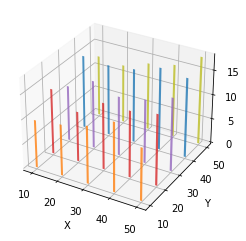

===RESULT===
optimal fitness :  19.096117122851705
optimal n population outer :  40
optimal n population inner :  50
time spending to optimal:  1017.6
[[9.7, 10.4, 11.7, 14.1, 10.7], [13.3, 10.2, 13.5, 13.5, 14.4], [11.3, 13.8, 12.1, 13.0, 14.9], [15.0, 14.5, 15.1, 16.8, 16.2], [12.5, 12.0, 13.8, 14.9, 17.9]]


In [130]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
def populationIterationTestingVisualization():
    calNeeds=1700
    popSize_outer=5
    popSize_inner=5
    optimalFitness=-1
    optimal_n_outer = 0
    optimal_n_inner = 0
    timeSpending = 0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    colors = ['tab:orange','tab:red','tab:purple','tab:blue','tab:olive']
    n_population_outer = [10,20,30,40,50]
    n_population_inner=[10,20,30,40,50]
    # ys=[34,56,34,89,34,67,12,9,23,5]
    fitnessArrayForVisualization=[]

    for c, n_outer in zip(colors,n_population_outer):
        ys = []
        for i in (n_population_inner):
            avgFitnessArray = []
            avgTimeArray = []
            # fitness,time = generateMealPlan(calNeeds,n_outer,i,popSize_outer,popSize_inner)
            for j in range(3):
                fitness,time = generateMealPlanWithCrMr(calNeeds,n_outer,i,popSize_outer,popSize_inner,0.5,0.5,0.5,0.5)
                avgFitnessArray.append(fitness)
                avgTimeArray.append(time)
            
            avgFitness = round(mean(avgFitnessArray),1)
            avgTime = round(mean(avgTimeArray),1)
            ys.append(avgFitness)
            # ys.append(fitness)
            if(avgFitness>optimalFitness):
                optimalFitness=fitness
                optimal_n_outer = n_outer
                optimal_n_inner = i
                timeSpending = avgTime 
                # timeSpending = time 
        
        cs = [c] * len(n_population_outer)
        ax.bar(n_population_inner, ys, zs=n_outer, zdir='y', color=cs, alpha=0.8)
        fitnessArrayForVisualization.append(ys)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_yticks(n_population_outer)

    plt.show()
    return optimalFitness, optimal_n_inner, optimal_n_outer,timeSpending,fitnessArrayForVisualization

optimalFitness, optimal_n_inner, optimal_n_outer,timeSpending,fitnessArrayForVisualization = populationIterationTestingVisualization()
print("===RESULT===")
print("optimal fitness : ", optimalFitness)
print("optimal n population outer : ", optimal_n_outer)
print("optimal n population inner : ", optimal_n_inner)
print("time spending to optimal: ", timeSpending)

print(fitnessArrayForVisualization)


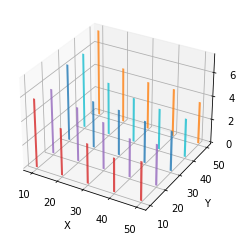

===RESULT===
optimal fitness :  7.4
optimal size population outer :  50
optimaL size population inner :  10
time spending to optimal:  372.7
[[5.8, 4.0, 3.4, 2.9, 3.3], [5.5, 4.6, 4.0, 3.3, 3.5], [6.5, 4.0, 3.9, 3.6, 3.4], [6.4, 4.5, 3.8, 3.5, 3.3], [7.4, 4.7, 4.1, 4.1, 3.6]]


In [131]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
def populationSizeTestingVisualization():
    calNeeds=1700
    n_iteration_outer=5
    n_iteration_inner=5
    optimal_popSize_outer=0
    optimal_popSize_inner=0
    optimalFitness=-1
    timeSpending = 0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # colors = ['tab:red','tab:purple','tab:blue','tab:olive','tab:cyan','tab:pink','tab:brown','tab:orange','tab:red']
    # colors = ['tab:red','tab:purple','tab:blue']
    colors = ['tab:red','tab:purple','tab:blue','tab:cyan','tab:orange']
    n_popSize_outer = [10,20,30,40,50]
    n_popSize_inner=[10,20,30,40,50]
    # ys=[34,56,34,89,34,67,12,9,23,5]
    fitnessArrayForVisualization=[]

    for c, popSize_outer in zip(colors,n_popSize_outer):
        ys = []
        for i in (n_popSize_inner):
            avgFitnessArray = []
            avgTimeArray = []
            # fitness,time = generateMealPlan(calNeeds,popSize_outer,i,popSize_outer,popSize_inner)
            for j in range(3):
                fitness,time = generateMealPlanWithCrMr(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,i,0.5,0.5,0.5,0.5)
                avgFitnessArray.append(fitness)
                avgTimeArray.append(time)
            
            avgFitness = round(mean(avgFitnessArray),1)
            avgTime = round(mean(avgTimeArray),1)
            ys.append(avgFitness)
            if(avgFitness>optimalFitness):
                optimalFitness=avgFitness
                optimal_popSize_outer = popSize_outer
                optimal_popSize_inner = i
                timeSpending = avgTime 
                # timeSpending = time 
        
        cs = [c] * len(n_popSize_outer)
        ax.bar(n_popSize_inner, ys, zs=popSize_outer, zdir='y', color=cs, alpha=0.8)
        fitnessArrayForVisualization.append(ys)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_yticks(n_popSize_outer)

    plt.show()
    return optimalFitness, optimal_popSize_inner, optimal_popSize_outer,timeSpending,fitnessArrayForVisualization

optimalFitness, optimal_popSize_inner, optimal_popSize_outer,timeSpending,fitnessArrayForVisualization = populationSizeTestingVisualization()
print("===RESULT===")
print("optimal fitness : ", optimalFitness)
print("optimal size population outer : ", optimal_popSize_outer)
print("optimaL size population inner : ", optimal_popSize_inner)
print("time spending to optimal: ", timeSpending)

print(fitnessArrayForVisualization)


In [24]:
# coba optimal popSize outer inner, n_iteration outer inner
fitness,time = generateMealPlan(1700,10,40,10,10)

kebutuhan kalori - real kalori :  1700  -  1764.7999999999997
kebutuhan karbo - real karbo :  255.0  -  279.20000000000005
kebutuhan prot - real prot :  63.75  -  66.68999999999998
kebutuhan lemak - real lemak :  28.333333333333332  -  44.57


===BREAKFAST===
sumber karbohidrat :  Nopia spesial   130.0 gr
sumber protein :  Ikan terbang, segar   90.0 gr
sumber sayuran/protein nabati :  Daun paku, segar   90.0 gr
===LUNCH===
sumber karbohidrat :  Nasi gemuk   80.0 gr
sumber protein :  Coto mangkasara,
sapi, masakan   100.0 gr
sumber sayuran/protein nabati :  Daun kelor, segar   110.00000000000001 gr
===DINNER===
sumber karbohidrat :  Nasi minyak   110.00000000000001 gr
sumber protein :  Sapi, otak, segar   120.0 gr
sumber sayuran/protein nabati :  Daun kesum, segar   70.0 gr
===CAMILAN===
camilan pagi (buah) :  Yangko   140.0 gr
camilan sore :  Srikaya, segar   70.0 gr


In [25]:
print(fitness)

9.24413767602381


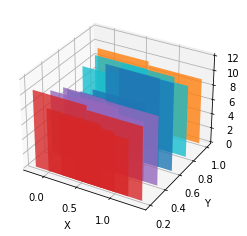

===RESULT===
optimal fitness :  12.0
optimal mutation rate outer :  0.6
optimal crossover rate outer :  0.8
time spending to optimal:  17.5
[[10.5, 8.6, 8.1, 7.7, 9.9], [8.7, 9.6, 9.0, 8.1, 9.4], [7.1, 7.3, 8.1, 12.0, 11.9], [8.6, 10.6, 9.2, 10.5, 9.8], [9.5, 7.5, 8.3, 7.5, 9.0]]


In [126]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
def crMrOuterTestingVisualization():
    calNeeds=1700
    n_iteration_outer=5
    n_iteration_inner=5
    popSize_outer=5
    popSize_inner=5
    optimal_cr_outer=0
    optimal_mr_outer=0
    optimalFitness=-1
    timeSpending = 0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # colors = ['tab:red','tab:purple','tab:blue','tab:olive','tab:cyan','tab:pink','tab:brown','tab:orange','tab:red']
    # colors = ['tab:red','tab:purple','tab:blue']
    colors = ['tab:red','tab:purple','tab:blue','tab:cyan','tab:orange']
    mutation_rate_outer = [0.2,0.4,0.6,0.8,1]
    crossover_rate_outer=[0.2,0.4,0.6,0.8,1]
    # ys=[34,56,34,89,34,67,12,9,23,5]
    fitnessArrayForVisualization=[]

    for c, mr_outer in zip(colors,mutation_rate_outer):
        ys = []
        for i in (crossover_rate_outer):
            avgFitnessArray = []
            avgTimeArray = []
            # fitness,time = generateMealPlan(calNeeds,mr_outer,i,mr_outer,popSize_inner)
            for j in range(3):
                fitness,time = generateMealPlanWithCrMr(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,popSize_inner,i,mr_outer,1,1)
                avgFitnessArray.append(fitness)
                avgTimeArray.append(time)
            
            avgFitness = round(mean(avgFitnessArray),1)
            avgTime = round(mean(avgTimeArray),1)
            ys.append(avgFitness)
            if(avgFitness>optimalFitness):
                optimalFitness=avgFitness
                optimal_mr_outer = mr_outer
                optimal_cr_outer = i
                timeSpending = avgTime 
                # timeSpending = time 
        
        cs = [c] * len(mutation_rate_outer)
        ax.bar(crossover_rate_outer, ys, zs=mr_outer, zdir='y', color=cs, alpha=0.8)
        fitnessArrayForVisualization.append(ys)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_yticks(mutation_rate_outer)

    plt.show()
    return optimalFitness, optimal_cr_outer, optimal_mr_outer,timeSpending,fitnessArrayForVisualization

optimalFitness, optimal_cr_outer, optimal_mr_outer,timeSpending,fitnessArrayForVisualization = crMrOuterTestingVisualization()
print("===RESULT===")
print("optimal fitness : ", optimalFitness)
print("optimal mutation rate outer : ", optimal_mr_outer)
print("optimal crossover rate outer : ", optimal_cr_outer)
print("time spending to optimal: ", timeSpending)

print(fitnessArrayForVisualization)


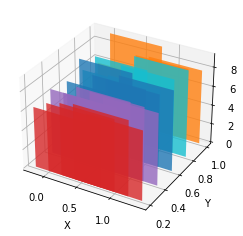

===RESULT===
optimal fitness :  9.2
optimal mutation rate inner :  1
optimal crossover rate inner :  0.4
time spending to optimal:  13.5
[[6.3, 7.1, 7.5, 7.8, 7.2], [6.8, 6.8, 7.8, 7.7, 7.5], [6.3, 9.0, 7.7, 7.6, 8.4], [6.2, 8.0, 6.4, 7.8, 9.1], [5.7, 9.2, 6.0, 7.6, 7.8]]


In [127]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
def crMrInnerTestingVisualization():
    calNeeds=1700
    n_iteration_outer=5
    n_iteration_inner=5
    popSize_outer=5
    popSize_inner=5
    optimal_cr_inner=0
    optimal_mr_inner=0
    optimalFitness=-1
    timeSpending = 0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # colors = ['tab:red','tab:purple','tab:blue','tab:olive','tab:cyan','tab:pink','tab:brown','tab:orange','tab:red']
    # colors = ['tab:red','tab:purple','tab:blue']
    colors = ['tab:red','tab:purple','tab:blue','tab:cyan','tab:orange']
    mutation_rate_inner = [0.2,0.4,0.6,0.8,1]
    crossover_rate_inner=[0.2,0.4,0.6,0.8,1]
    # ys=[34,56,34,89,34,67,12,9,23,5]
    fitnessArrayForVisualization=[]

    for c, mr_inner in zip(colors,mutation_rate_inner):
        ys = []
        for i in (crossover_rate_inner):
            avgFitnessArray = []
            avgTimeArray = []
            # fitness,time = generateMealPlan(calNeeds,mr_inner,i,mr_inner,popSize_inner)
            for j in range(3):
                fitness,time = generateMealPlanWithCrMr(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,popSize_inner,1,1,i,mr_inner)
                avgFitnessArray.append(fitness)
                avgTimeArray.append(time)
            
            avgFitness = round(mean(avgFitnessArray),1)
            avgTime = round(mean(avgTimeArray),1)
            ys.append(avgFitness)
            if(avgFitness>optimalFitness):
                optimalFitness=avgFitness
                optimal_mr_inner = mr_inner
                optimal_cr_inner = i
                timeSpending = avgTime 
                # timeSpending = time 
        
        cs = [c] * len(mutation_rate_inner)
        ax.bar(crossover_rate_inner, ys, zs=mr_inner, zdir='y', color=cs, alpha=0.8)
        fitnessArrayForVisualization.append(ys)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_yticks(mutation_rate_inner)

    plt.show()
    return optimalFitness, optimal_cr_inner, optimal_mr_inner,timeSpending,fitnessArrayForVisualization

optimalFitness, optimal_cr_inner, optimal_mr_inner,timeSpending,fitnessArrayForVisualization = crMrInnerTestingVisualization()
print("===RESULT===")
print("optimal fitness : ", optimalFitness)
print("optimal mutation rate inner : ", optimal_mr_inner)
print("optimal crossover rate inner : ", optimal_cr_inner)
print("time spending to optimal: ", timeSpending)

print(fitnessArrayForVisualization)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from statistics import mean
# def crMrInnerTestingVisualization():
#     calNeeds=1700
#     n_iteration_outer=5
#     n_iteration_inner=5
#     popSize_outer=5
#     popSize_inner=5
#     optimal_cr_outer=0
#     optimal_mr_inner=0
#     optimalFitness=-1
#     timeSpending = 0
#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')

#     # colors = ['tab:red','tab:purple','tab:blue','tab:olive','tab:cyan','tab:pink','tab:brown','tab:orange','tab:red']
#     # colors = ['tab:red','tab:purple','tab:blue']
#     colors = ['tab:red','tab:purple','tab:blue','tab:cyan','tab:orange']
#     mutation_rate_outer = [0.2,0.4,0.6,0.8,1]
#     crossover_rate_outer=[0.2,0.4,0.6,0.8,1]
#     # ys=[34,56,34,89,34,67,12,9,23,5]
#     fitnessArrayForVisualization=[]

#     for c, mr_outer in zip(colors,mutation_rate_outer):
#         ys = []
#         for i in (crossover_rate_outer):
#             avgFitnessArray = []
#             avgTimeArray = []
#             # fitness,time = generateMealPlan(calNeeds,mr_outer,i,mr_outer,popSize_inner)
#             for j in range(3):
#                 fitness,time = generateMealPlanWithCrMr(calNeeds,n_iteration_outer,n_iteration_inner,popSize_outer,popSize_inner,i,mr_outer,1,1)
#                 avgFitnessArray.append(fitness)
#                 avgTimeArray.append(time)
            
#             avgFitness = round(mean(avgFitnessArray),1)
#             avgTime = round(mean(avgTimeArray),1)
#             ys.append(avgFitness)
#             if(fitness>optimalFitness):
#                 optimalFitness=fitness
#                 optimal_mr_outer = mr_outer
#                 optimal_cr_outer = i
#                 timeSpending = avgTime 
#                 # timeSpending = time 
        
#         cs = [c] * len(mutation_rate_outer)
#         ax.bar(crossover_rate_outer, ys, zs=mr_outer, zdir='y', color=cs, alpha=0.8)
#         fitnessArrayForVisualization.append(ys)

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')

#     ax.set_yticks(mutation_rate_outer)

#     plt.show()
#     return optimalFitness, optimal_cr_outer, optimal_mr_outer,timeSpending,fitnessArrayForVisualization

# optimalFitness, optimal_cr_outer, optimal_mr_outer,timeSpending,fitnessArrayForVisualization = crMrOuterTestingVisualization()
# print("===RESULT===")
# print("optimal fitness : ", optimalFitness)
# print("optimal mutation rate outer : ", optimal_mr_outer)
# print("optimal crossover rate inner : ", optimal_cr_outer)
# print("time spending to optimal: ", timeSpending)

# print(fitnessArrayForVisualization)


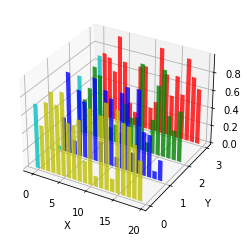

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

In [96]:
import random

def decision(probability):
    return random.random() < probability

decision(1)

True